# Comm 461 Assignment 2 Part A


** SUBMITTED BY: **

Michael Krakovsky 10134030 | Aidan Horvath 10132966 | David Aquino 10134911 | Abhit Sahota 10147351

## Instructions

For this assignment, you are asked to use data science tools to solve a business problem. Your evaluation is based on your implementation and understanding of the steps taken in your analysis.

You are expected to implement your model using Python 3 code using default Anacoda package and when prompted, provide your written answers to the questions in the markdown cells.

Submit your completed notebook to the class dropbox.

---

## Business Problem

Your team of analysts is consulting for a financial firm who is launching a new financial product. They ask you to help them predict the income of their customers based on census data. They will use these predictions for a targeted marketing campaign.

Your client also shared the following information:

* Making an offer to a customer costs 5 dollars.
* Selling the financial product to a customer yeild 25 dollars in revenue.
* Customer will only accept the offer if their income >50K.

To complete this task, your client gave you a census dataset with customer data and wants you to train at least 4 classification models to predict if the income level of a customer in >50K. 

They then want you to use your model to determine the % of their customer base they should target in order to maximize expected profit.

The steps of your analysis can be broken down as follows:

1. Load Dataset & Train/Test Split   (Complete)
2. Feature Preprocessing & Selection
4. Model Training
5. Model Validation & Selection
6. Model Use

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

---
## 1. Load Dataset & Train/Test Split
You should test your model on 20% of the data.

In [3]:
df_censusDataSet = pd.read_csv('census.csv')    #load data 
# I split the data later after I converting everything to dummy variables

## 2. Feature Preprocessing & Selection

In [10]:
# Assign the Dataframe of features to 'features' variable 
# and the outcome of the income-class variable to 'outcome' variable
features = df_censusDataSet.drop('income-class', 1)
# 1 assigned to income earners over 50k otherwise 0
outcome = pd.get_dummies(df_censusDataSet['income-class'], drop_first=True)

In [11]:
# We will now attempt to dummy categoriacal variables
# First we view how many different categories each set contains
for colName in features.columns:
    if features[colName].dtypes == 'object':
        uniqueCount = len(features[colName].unique())
        print("Name of Feature '{colName}' contains {uniqueCount} different categories.".format(
            colName=colName, uniqueCount=uniqueCount))

Name of Feature 'workclass' contains 7 different categories.
Name of Feature 'education' contains 16 different categories.
Name of Feature 'marital-status' contains 7 different categories.
Name of Feature 'occupation' contains 14 different categories.
Name of Feature 'relationship' contains 6 different categories.
Name of Feature 'race' contains 5 different categories.
Name of Feature 'sex' contains 2 different categories.
Name of Feature 'native-country' contains 41 different categories.


In [12]:
# Since native country contains a lot of different categories, we will not sign a 
# unique dummy variable to each native country. Let's see the frequence of every name 
# that appears in this category.
print(features['native-country'].value_counts().sort_values(ascending=False).head(5))

United-States    27504
Mexico             610
Philippines        188
Germany            128
Puerto-Rico        109
Name: native-country, dtype: int64


In [13]:
# Since the US contains the majority of our data, we will seperate the US from the others
features['native-country'] = ['United-States' if i == 'United-States' else 'Other' for i in features['native-country']]
print(features['native-country'].value_counts().sort_values(ascending=False).head(20))

United-States    27504
Other             2658
Name: native-country, dtype: int64


In [14]:
# Create a dummy function that dropes category you wish to convert to dummy variabels
def transferToDummy(df, dummyList):
    for i in dummyList:
        dummies = pd.get_dummies(df[i], prefix=i, dummy_na=False)
        df = df.drop(i, 1)
        df = pd.concat([df, dummies], axis=1)
    return df

# Create the list of categories to include
dummyList = ['education', 'workclass', 'marital-status', 'occupation', 
             'relationship', 'race', 'sex', 'native-country']
# Convert the indicated categories to dummy variables
features = transferToDummy(features, dummyList)
print(features)
for i in features:
    for y in i:
        if(isinstance(y, str)):
            print("There is a string: " + i + ' ' + y)

       age  fnlwgt  education-num  capital-gain  capital-loss  hours-per-week  \
0       39   77516             13          2174             0              40   
1       50   83311             13             0             0              13   
2       38  215646              9             0             0              40   
3       53  234721              7             0             0              40   
4       28  338409             13             0             0              40   
5       37  284582             14             0             0              40   
6       49  160187              5             0             0              16   
7       52  209642              9             0             0              45   
8       31   45781             14         14084             0              50   
9       42  159449             13          5178             0              40   
10      37  280464             10             0             0              80   
11      30  141297          

In [15]:
# Check the number of data that was missing --> There are no missing values
features.isnull().sum().sort_values(ascending=False).head()

native-country_United-States         0
marital-status_Married-civ-spouse    0
marital-status_Divorced              0
workclass_Without-pay                0
workclass_State-gov                  0
dtype: int64

In [16]:
xTrain, xTest, yTrain, yTest = train_test_split(features, outcome, train_size=0.8, random_state=1)

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [19]:
import sklearn.feature_selection

select = sklearn.feature_selection.SelectKBest(k=10)
selected_features = select.fit(xTrain, yTrain)
indices_selected = selected_features.get_support(indices=True)
colname_selected = [features.columns[i] for i in indices_selected]

xTrainSelected = xTrain[colname_selected]
xTestSelected = xTest[colname_selected]

print(colname_selected)

['age', 'education-num', 'capital-gain', 'hours-per-week', 'marital-status_Married-civ-spouse', 'marital-status_Never-married', 'relationship_Husband', 'relationship_Own-child', 'sex_Female', 'sex_Male']


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


---
### Questions
1. Explain why you selected those features to train your classifiers.
2. If you could ask for additional data on the customers, what data would you ask for?

1. The .selectKBest function of the sklearn class .feature_selection was utilized to determine the best features to consider. This function chooses the k-best features from a set by scoring them based on their ANOVA f-value for the sample set. To determine the optimal k-value, multiple k-values were tested and the resulting AUCs for each of the chosen models were observed. The k-value which resulted in the maximum AUC for any of the four models was used. The optimal value was k= 20, associated with a Logistic Regression AUC of 0.90. Hence, the 20 “best” features based on the selectKBest function were used.

2. If possible, customer financial data directly from the client firm itself would be useful. For example, if this firm is a Bank, customer-level data like account balances, monthly deposits, and/or monthly spending. This would provide a far "tighter" link to income than merely demographic factors. Potentially combined with this could be data on whether or not a customer is a "primary customer" of the bank (i.e: based on their level of activity / the number of products they own, is a certain customer likely to bank ONLY with the client?). The logic being that it would be helpful to know if a customer's spending levels can be expected to encompass ALL of their spending, or just a portion of it. If the firm is another type of financial institution (i.e. investment management, insurance, etc), other relevant financial data could also be used (ex: total $$ invested, absolute value of assets insured) to help estimate income. 

Beyond financial data, other demographic data may be helpful: For example, current country of residence would likely be more linked to income then native country. Data on other family members may also be useful if applicable. For example, parent income or occupation likely is quite predicting of child income. 


---
## 4. Model Training

You are expected to implement at least 4 of the following classification models.
* K Nearest Neighbors
* Linear Discriminant Analysis
* Decision Trees
* Logistic Regression
* Naïve Bayes

More information on these models can be found here: http://scikit-learn.org/stable/supervised_learning.html#supervised-learning

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

In [12]:
# 1. Creating a K Nearest Neighbors
clf = KNeighborsClassifier()
clf.fit(xTrainSelected, yTrain)
accuracy = clf.score(xTestSelected, yTest)
print(accuracy)

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


0.837560086193


In [13]:
# 2. Creating a Decision Tree
tree = DecisionTreeClassifier()
tree.fit(xTrainSelected, yTrain)
print(tree.score(xTestSelected, yTest))

0.819161279629


In [14]:
# 4. Creating a Logistic Regression
logitReg = LogisticRegression()
logitReg.fit(xTrainSelected, yTrain)
print(logitReg.score(xTestSelected, yTest))

C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.845019061827


In [15]:
# 5. Create a Naive Bayes
bayes = GaussianNB()
bayes.fit(xTrainSelected, yTrain)
print(bayes.score(xTestSelected, yTest))

0.833250455826


C:\Users\micha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## 5. Model Validation & Selection

You are expected to validate your models using ROC Curves and Lift Curves.

For convenience, the following functions allow you to plot these.

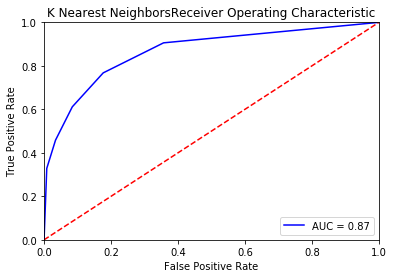

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


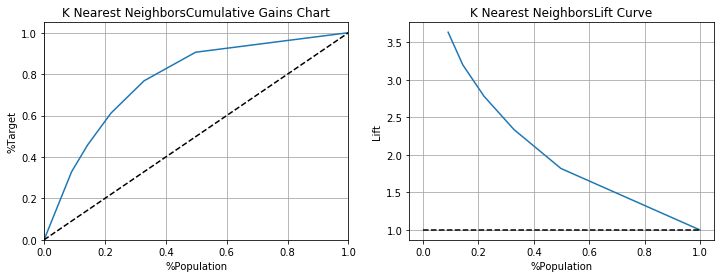

In [19]:
predicted = clf.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
roc_plot(yTest, predictedProbs, "K Nearest Neighbors")
lift_plot(yTest, predictedProbs, "K Nearest Neighbors")

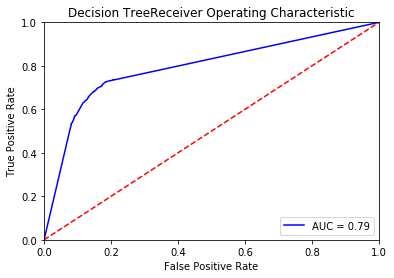

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


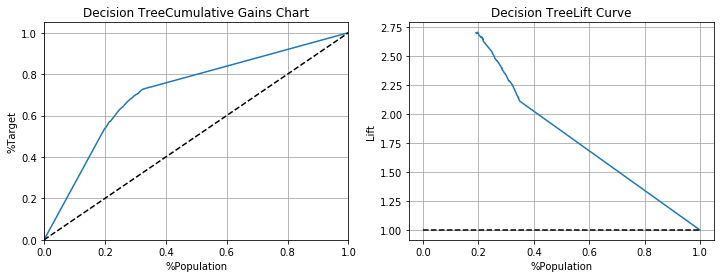

In [20]:
predicted = tree.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
roc_plot(yTest, predictedProbs, "Decision Tree")
lift_plot(yTest, predictedProbs, "Decision Tree")

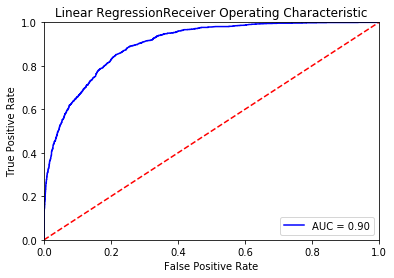

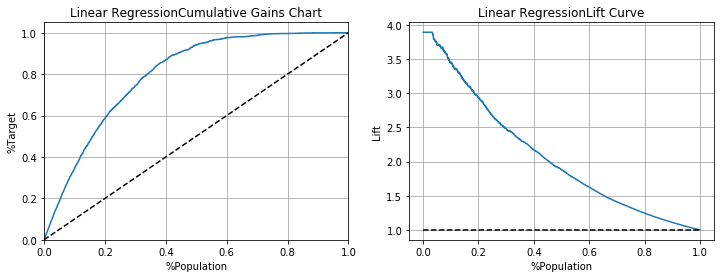

In [21]:
predicted = logitReg.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
roc_plot(yTest, predictedProbs, "Linear Regression")
lift_plot(yTest, predictedProbs, "Linear Regression")

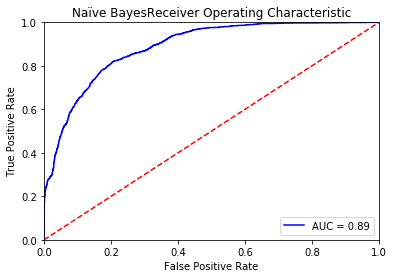

C:\Users\micha\Anaconda3\lib\site-packages\ipykernel_launcher.py:50: RuntimeWarning: invalid value encountered in true_divide


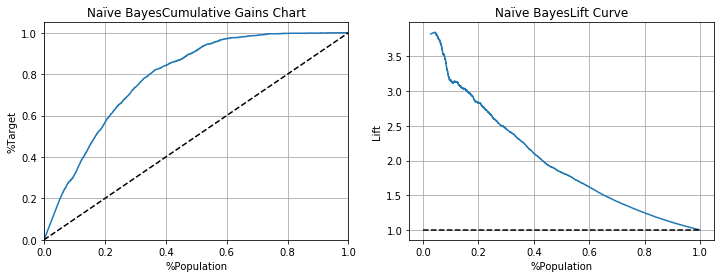

In [22]:
predicted = bayes.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
roc_plot(yTest, predictedProbs, "Naïve Bayes")
lift_plot(yTest, predictedProbs, "Naïve Bayes")

In [18]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def roc_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: ROC plot with AUC
    """
    fpr, tpr, _ = roc_curve(actual, probability)
    plt.title(model_name+'Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc(fpr, tpr))
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    return plt.show()

def lift_plot(actual, probability, model_name):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    - name of the classifier (string)
    
    Output: Cummulative Gain Chart and Lift Curve
    """
    count = actual.count()
    totalSum = actual.sum()
    fpr, tpr, thresholds = roc_curve(actual, probability)
    ppr=(tpr*totalSum[0]+fpr*(count[0]-totalSum[0]))/count[0]
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    plt.plot(ppr, tpr, label='')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('%Target')
    plt.title(model_name+'Cumulative Gains Chart')
    plt.legend(loc="lower right")

    plt.subplot(1,2,2)
    plt.plot(ppr, tpr/ppr, label='')
    plt.plot([0, 1], [1, 1], 'k--')
    plt.grid(b=True, which='both', color='0.65',linestyle='-')
    plt.xlabel('%Population')
    plt.ylabel('Lift')
    plt.title(model_name+'Lift Curve')

---
### Questions
1. Reccomend a classifier using your intepretation of the ROC and Lift curves.
2. How could you further increase the performance of your classifiers?

1. Logistic Regression is our recommended classifier. Looking first at the ROC curves, Logistic Regression has the largest Area Under Curve (0.90), slightly more than Naive Bayes (0.89), which performed second best. Furthermore, Logistic Regression clearly provides more lift than the other classifiers at lower targeting thresholds, although its lift curve becomes very similar to those of KNN and Naive Bayes above a % targeted of ~0.60. However, Logistic Regression’s clear advantage at lower thresholds, combined with its superior ROC curve, make it the optimal choice. 

2. Given that logistic regression was chosen as our model type, there are a variety of ways in which its performance could be improved. Likely the most salient would be “bagging,” or bootstrap aggregating. Bagging would entail training the model on a group of random samples from the training set, and then averaging the results to ultimately determine a classification. In this way, bagging can be expected to reduce the component of generalization error attributable to variance specific to our training set. This would be especially effective for logistic regression, given this model’s susceptibility to overfitting because of training set outliers.

Another potential method to improve model performance is boosting: sequentially applying different model versions to datasets where previously mis-classified instances are weighed more heavily. While boosting is provably effective at reducing generalization error due to model bias / under-fitting, its use would raise some concerns given that we are using logistic regression. Specifically, boosting does not address the tendency for this model type to over-fit training data. In fact, the use of a relatively high learning rate in the boosting process may actually increase over-fitting.  Hence, were this method to be used, strong monitoring would be needed. 

---
## 6. Model Use

You are expected to create a plot like this one taken from page 213 of the textbook.

The profit_curve function returns the data necessary to plot a profit curve. 

The plot elements we are looking for are:
* Profit curves for selected models (make sure you only use validated models!)
* Profit curve for a random selection (you can use the profit_curve function with .5 for all the probabilities!)
* Indicator of max profit (can be a simple dot!)
* Title, Legend, Axis titles, Axis values

<img src="profit_curve.png">

In [23]:
def profit_curve(actual, probability):
    """
    Inputs: 
    - actual values of y_test (1 dimensional array)
    - probability estimate of y_test (1 dimensional array)
    
    Outputs: 
    - cumulative percentage of customers targeted (1 dimensional array)
    - cumulative profit from targeting (1 dimensional array)
    - optimal percentage of targeted customers to maximize profits (number)
    - maximum profit acheivable (number)
    
    Example Call:
    >>> cum_percent, cum_profit, optimal_targeting, max_profit = profit_curve(actual, probability)
    """
    
    TP = 20
    FP = -5

    df = pd.DataFrame([actual,probability], index=['a','p']).T.sort_values('p',ascending=False)
    for i in range(0, len(df['a'])):     # I was getting single element arrays
        if df['a'][i] == [1]:           #Therefore I converted the arrays to ints
            df['a'][i] = 1
        else:
            df['a'][i] = 0
    df['profit'] = np.where(df['a'] == 1, TP, FP)
    df['cum_profit'] = df['profit'].cumsum()
    df['counter'] = 1
    df['cum_percent'] = df['counter'].cumsum() / len(df['counter'])

    max_index = np.argmax(df['cum_profit'])
    max_profit = df['cum_profit'][max_index]
    optimal_targeting = df['cum_percent'][max_index]
    
    return df['cum_percent'], df['cum_profit'], optimal_targeting, max_profit

In [24]:
# Find values of logistical regression
predicted = logitReg.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
yTestToList = yTest.values.tolist()
logCum_percent, logCum_profit, logOptimal_targeting, logMax_profit = profit_curve(yTestToList, predictedProbs)

In [25]:
# Find values of Naïve Bayes
predicted = bayes.predict_proba(xTestSelected)
predictedProbs = [i[1] for i in predicted]
yTestToList = yTest.values.tolist()
NaiCum_percent, NaiCum_profit, NaiOptimal_targeting, NaiMax_profit = profit_curve(yTestToList, predictedProbs)

In [26]:
# Profit curve for a random selection
predictedProbs = [0.5 for i in range(0, 6033)]
yTestToList = yTest.values.tolist()
RanCum_percent, RanCum_profit, RanOptimal_targeting, RanMax_profit = profit_curve(yTestToList, predictedProbs)

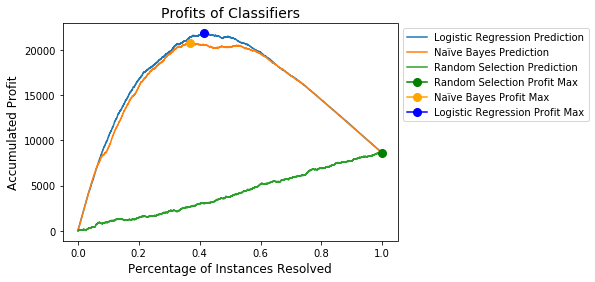

In [27]:
# Plot indicated models
plt.plot(logCum_percent, logCum_profit, label='Logistic Regression Prediction')
plt.plot(NaiCum_percent, NaiCum_profit, label='Naïve Bayes Prediction')
plt.plot(RanCum_percent, RanCum_profit, label='Random Selection Prediction')
# Plot max points
plt.plot(RanOptimal_targeting, RanMax_profit, marker='o', markersize=8, color="green", label='Random Selection Profit Max')
plt.plot(NaiOptimal_targeting, NaiMax_profit, marker='o', markersize=8, color="orange", label='Naïve Bayes Profit Max')
plt.plot(logOptimal_targeting, logMax_profit, marker='o', markersize=8, color="blue", label='Logistic Regression Profit Max')
# Plot axis
plt.ylabel('Accumulated Profit', fontsize=12)
plt.xlabel('Percentage of Instances Resolved', fontsize=12)
plt.title('Profits of Classifiers', fontsize=14)
# Plot legend and show
plt.legend(bbox_to_anchor=(1, 1))
plt.show()

---
### Questions
1. According to your analysis, what % of the customer base should your client target and what would be their expected profit?
2. If your client had a limited budget of 4500 dollars and 6000 potential customers. What % of the customer base should your client target and approximately what would be their expected profit?

1. If given an unlimited budget, our analysis shows that our client should ideally be targeting slightly above 40% of their overall customer base. Using the Logistic Regression profit curve, this target level allows us to maximize our client’s overall profit at approximately $21,000. We chose to use the Logistic Regression model because it yields a higher maximum profit level than the Naive Bayes and Random Predictor models.

2. Given that targeting costs $5 per customer, our $4,500 budget only allows our client to target a maximum of 900 customers. This represents 15% of the potential customer base (6,000 people overall). Within this constraint, the Logistic Regression model once again outperforms Naive Bayes and Random Selection in terms of maximum profit level. Our client should be targeting 15% of potential clients (the maximum allowed under their budget), expecting to earn approximately $14,000 in profit.